In [636]:
import pandas as pd

In [642]:
df = pd.read_csv("fight_results.csv")

In [643]:
df["Date"] = pd.to_datetime(df["Date"])

In [644]:
df

,Unnamed: 0,Date,Weight class,Method,Round,Winner,Blue,Red,Blue_Kd_Landed,Red_Kd_Landed,Blue_Str_Landed,Red_Str_Landed,Blue_Sub_Landed,Red_Sub_Landed
0,0,2025-07-26,Middleweight,DEC,5,Blue,Reinier de Ridder,Robert Whittaker,0.0,1.0,67.0,66.0,0.0,0.0
1,1,2025-07-26,Bantamweight,DEC,3,Blue,Petr Yan,Marcus McGhee,0.0,0.0,81.0,64.0,0.0,0.0
2,2,2025-07-26,Middleweight,DEC,3,Blue,Shara Magomedov,Marc-Andre Barriault,0.0,0.0,93.0,39.0,0.0,0.0
3,3,2025-07-26,Flyweight,DEC,3,Blue,Asu Almabayev,Jose Ochoa,0.0,0.0,22.0,26.0,2.0,2.0
4,4,2025-07-26,Light Heavyweight,KO,1,Blue,Bogdan Guskov,Nikita Krylov,1.0,0.0,23.0,16.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8271,8271,1994-03-11,Open Weight,KO,1,Blue,Orlando Wiet,Robert Lucarelli,0.0,0.0,8.0,2.0,0.0,1.0
8272,8272,1994-03-11,Open Weight,SUB,1,Blue,Frank Hamaker,Thaddeus Luster,0.0,0.0,2.0,0.0,3.0,0.0
8273,8273,1994-03-11,Open Weight,KO,1,Blue,Johnny Rhodes,David Levicki,0.0,0.0,11.0,4.0,0.0,0.0
8274,8274,1994-03-11,Open Weight,SUB,1,Blue,Patrick Smith,Ray Wizard,0.0,0.0,1.0,1.0,1.0,0.0


In [646]:
blue_df = df[[
    "Date", "Blue", "Red", "Winner",
    "Blue_Kd_Landed", "Blue_Str_Landed", "Blue_Sub_Landed"
]].rename(columns={
    "Blue": "Fighter",
    "Red": "Opponent",
    "Blue_Kd_Landed": "KD",
    "Blue_Str_Landed": "STR",
    "Blue_Sub_Landed": "SUB"
})
blue_df["Was_Blue"] = True
blue_df["Is_Winner"] = True


In [647]:
blue_df.head()

,Date,Fighter,Opponent,Winner,KD,STR,SUB,Was_Blue,Is_Winner
0,2025-07-26,Reinier de Ridder,Robert Whittaker,Blue,0.0,67.0,0.0,True,True
1,2025-07-26,Petr Yan,Marcus McGhee,Blue,0.0,81.0,0.0,True,True
2,2025-07-26,Shara Magomedov,Marc-Andre Barriault,Blue,0.0,93.0,0.0,True,True
3,2025-07-26,Asu Almabayev,Jose Ochoa,Blue,0.0,22.0,2.0,True,True
4,2025-07-26,Bogdan Guskov,Nikita Krylov,Blue,1.0,23.0,0.0,True,True


In [648]:
red_df = df[[
    "Date", "Red", "Blue", "Winner",
    "Red_Kd_Landed", "Red_Str_Landed", "Red_Sub_Landed"
]].rename(columns={
    "Blue": "Opponent",
    "Red": "Fighter",
    
    "Red_Kd_Landed": "KD",
    "Red_Str_Landed": "STR",
    "Red_Sub_Landed": "SUB"
})
red_df["Was_Blue"] = False
red_df["Is_Winner"] = False


In [649]:
red_df.head()

,Date,Fighter,Opponent,Winner,KD,STR,SUB,Was_Blue,Is_Winner
0,2025-07-26,Robert Whittaker,Reinier de Ridder,Blue,1.0,66.0,0.0,False,False
1,2025-07-26,Marcus McGhee,Petr Yan,Blue,0.0,64.0,0.0,False,False
2,2025-07-26,Marc-Andre Barriault,Shara Magomedov,Blue,0.0,39.0,0.0,False,False
3,2025-07-26,Jose Ochoa,Asu Almabayev,Blue,0.0,26.0,2.0,False,False
4,2025-07-26,Nikita Krylov,Bogdan Guskov,Blue,0.0,16.0,0.0,False,False


In [650]:
combined = pd.concat([blue_df, red_df])

In [651]:
combined #have to group by opponent because we want the strikes absorbed/ how many times the fighter got knocked down or was put in a submission position etc in the last #x fights

,Date,Fighter,Opponent,Winner,KD,STR,SUB,Was_Blue,Is_Winner
0,2025-07-26,Reinier de Ridder,Robert Whittaker,Blue,0.0,67.0,0.0,True,True
1,2025-07-26,Petr Yan,Marcus McGhee,Blue,0.0,81.0,0.0,True,True
2,2025-07-26,Shara Magomedov,Marc-Andre Barriault,Blue,0.0,93.0,0.0,True,True
3,2025-07-26,Asu Almabayev,Jose Ochoa,Blue,0.0,22.0,2.0,True,True
4,2025-07-26,Bogdan Guskov,Nikita Krylov,Blue,1.0,23.0,0.0,True,True
...,...,...,...,...,...,...,...,...,...
8271,1994-03-11,Robert Lucarelli,Orlando Wiet,Blue,0.0,2.0,1.0,False,False
8272,1994-03-11,Thaddeus Luster,Frank Hamaker,Blue,0.0,0.0,0.0,False,False
8273,1994-03-11,David Levicki,Johnny Rhodes,Blue,0.0,4.0,0.0,False,False
8274,1994-03-11,Ray Wizard,Patrick Smith,Blue,0.0,1.0,0.0,False,False


In [652]:
sorted_comb = combined.sort_values(by="Date", ascending=False)

In [654]:
sorted_comb[["Opponent", "KD", "STR", "SUB"]].groupby("Opponent").mean() #This table is how many knockdowns these fighters have taken in all their fights on average, average strikes absorbed and # of times been put in sub attempts.

,KD,STR,SUB
Opponent,,,
AJ Cunningham,0.500000,39.000000,0.500000
AJ Dobson,0.250000,69.500000,0.000000
AJ Fletcher,0.000000,55.000000,0.250000
Aalon Cruz,0.500000,32.500000,0.000000
Aaron Brink,0.000000,2.000000,2.000000
...,...,...,...
Zhang Tiequan,0.500000,20.000000,1.250000
Zhang Weili,0.166667,40.166667,0.250000
Zubaira Tukhugov,0.000000,38.444444,0.222222


In [655]:
test = sorted_comb[["Opponent", "KD", "STR", "SUB"]].groupby("Opponent").rolling(3).mean()

In [656]:
sorted_comb[sorted_comb["Opponent"] == "Zhang Weili"][["STR"]]

,STR
253,12.0
657,43.0
984,24.0
1390,6.0
1621,43.0
1913,86.0
2198,5.0
2733,186.0
2989,4.0
3260,30.0


In [657]:
sorted_comb.head(15)

,Date,Fighter,Opponent,Winner,KD,STR,SUB,Was_Blue,Is_Winner
0,2025-07-26,Reinier de Ridder,Robert Whittaker,Blue,0.0,67.0,0.0,True,True
1,2025-07-26,Petr Yan,Marcus McGhee,Blue,0.0,81.0,0.0,True,True
11,2025-07-26,Marcus Buchecha,Martin Buday,Blue,0.0,24.0,0.0,False,False
10,2025-07-26,Mohammad Yahya,Steven Nguyen,Blue,0.0,57.0,0.0,False,False
9,2025-07-26,Ibo Aslan,Billy Elekana,Blue,0.0,28.0,0.0,False,False
8,2025-07-26,Amanda Ribas,Tabatha Ricci,Blue,0.0,30.0,0.0,False,False
7,2025-07-26,Da'Mon Blackshear,Davey Grant,Blue,0.0,33.0,1.0,False,False
6,2025-07-26,Carlos Leal,Muslim Salikhov,Blue,0.0,5.0,0.0,False,False
5,2025-07-26,Said Nurmagomedov,Bryce Mitchell,Blue,1.0,20.0,1.0,False,False
4,2025-07-26,Nikita Krylov,Bogdan Guskov,Blue,0.0,16.0,0.0,False,False


In [658]:
test = sorted_comb.copy()

In [659]:
test.drop(["Winner", "Was_Blue"], axis=1, inplace=True)

In [660]:
test[["Fighter", "Opponent"]] = test[["Opponent", "Fighter"]]
test.rename(columns = {"KD": "KD_Absorbed", "STR": "STR_Absorbed", "SUB": "SUB_Faced"}, inplace=True)
test["Is_Winner"] = ~test["Is_Winner"]

In [661]:
test

,Date,Fighter,Opponent,KD_Absorbed,STR_Absorbed,SUB_Faced,Is_Winner
0,2025-07-26,Robert Whittaker,Reinier de Ridder,0.0,67.0,0.0,False
1,2025-07-26,Marcus McGhee,Petr Yan,0.0,81.0,0.0,False
11,2025-07-26,Martin Buday,Marcus Buchecha,0.0,24.0,0.0,True
10,2025-07-26,Steven Nguyen,Mohammad Yahya,0.0,57.0,0.0,True
9,2025-07-26,Billy Elekana,Ibo Aslan,0.0,28.0,0.0,True
...,...,...,...,...,...,...,...
8262,1994-03-11,Remco Pardoel,Royce Gracie,0.0,0.0,1.0,False
8263,1994-03-11,Johnny Rhodes,Patrick Smith,0.0,5.0,1.0,False
8264,1994-03-11,Jason DeLucia,Royce Gracie,0.0,0.0,1.0,False
8265,1994-03-11,Orlando Wiet,Remco Pardoel,0.0,7.0,0.0,False


In [662]:
test["Last_Fight_Date"] = test.groupby("Fighter")["Date"].transform(lambda x: x.shift(-1))

In [663]:
test["Days_Since_Last_Fight"] = test["Date"] - test["Last_Fight_Date"]

In [664]:
test[test["Fighter"] == "Reinier de Ridder"]

,Date,Fighter,Opponent,KD_Absorbed,STR_Absorbed,SUB_Faced,Is_Winner,Last_Fight_Date,Days_Since_Last_Fight
0,2025-07-26,Reinier de Ridder,Robert Whittaker,1.0,66.0,0.0,True,2025-05-03,84 days
120,2025-05-03,Reinier de Ridder,Bo Nickal,0.0,8.0,0.0,True,2025-01-18,105 days
279,2025-01-18,Reinier de Ridder,Kevin Holland,0.0,11.0,0.0,True,2024-11-09,70 days
355,2024-11-09,Reinier de Ridder,Gerald Meerschaert,0.0,30.0,0.0,True,NaT,NaT


In [665]:
for i in ["KD_Absorbed", "STR_Absorbed", "SUB_Faced"]:
    test["Prev_" + i] = test.groupby("Fighter")[i].transform(lambda x: x.shift(-1))

In [666]:
test[test["Fighter"]== "Zhang Weili"] 

,Date,Fighter,Opponent,KD_Absorbed,STR_Absorbed,SUB_Faced,Is_Winner,Last_Fight_Date,Days_Since_Last_Fight,Prev_KD_Absorbed,Prev_STR_Absorbed,Prev_SUB_Faced
253,2025-02-08,Zhang Weili,Tatiana Suarez,0.0,12.0,0.0,True,2024-04-13,301 days,1.0,43.0,0.0
657,2024-04-13,Zhang Weili,Yan Xiaonan,1.0,43.0,0.0,True,2023-08-19,238 days,0.0,24.0,2.0
984,2023-08-19,Zhang Weili,Amanda Lemos,0.0,24.0,2.0,True,2022-11-12,280 days,0.0,6.0,0.0
1390,2022-11-12,Zhang Weili,Carla Esparza,0.0,6.0,0.0,True,2022-06-11,154 days,0.0,43.0,0.0
1621,2022-06-11,Zhang Weili,Joanna Jedrzejczyk,0.0,43.0,0.0,True,2021-11-06,217 days,0.0,86.0,0.0
1913,2021-11-06,Zhang Weili,Rose Namajunas,0.0,86.0,0.0,False,2021-04-24,196 days,1.0,5.0,0.0
2198,2021-04-24,Zhang Weili,Rose Namajunas,1.0,5.0,0.0,False,2020-03-07,413 days,0.0,186.0,0.0
2733,2020-03-07,Zhang Weili,Joanna Jedrzejczyk,0.0,186.0,0.0,True,2019-08-31,189 days,0.0,4.0,0.0
2989,2019-08-31,Zhang Weili,Jessica Andrade,0.0,4.0,0.0,True,2019-03-02,182 days,0.0,30.0,0.0
3260,2019-03-02,Zhang Weili,Tecia Pennington,0.0,30.0,0.0,True,2018-11-24,98 days,0.0,9.0,0.0


In [668]:
test2 = test.copy()

In [669]:
test2.reset_index(inplace=True)

In [670]:
len(test2)

16552

In [671]:
(test2[test2["Days_Since_Last_Fight"].isna()]["Is_Winner"] == True).sum()

np.int64(1128)

In [672]:
for i in ["Prev_KD_Absorbed", "Prev_STR_Absorbed", "Prev_SUB_Faced"]:
    names = {"Prev_KD_Absorbed": "KD_Absorbed", "Prev_STR_Absorbed": "STR_Absorbed", "Prev_SUB_Faced": "SUB_Faced"}
    test2["Past_3_" + names[i]] = test2.groupby("Fighter", as_index = False)[i].rolling(3).mean()[i].shift(-2)

In [673]:
test2[test2["Fighter"] == "Robert Whittaker"]

,index,Date,Fighter,Opponent,KD_Absorbed,STR_Absorbed,SUB_Faced,Is_Winner,Last_Fight_Date,Days_Since_Last_Fight,Prev_KD_Absorbed,Prev_STR_Absorbed,Prev_SUB_Faced,Past_3_KD_Absorbed,Past_3_STR_Absorbed,Past_3_SUB_Faced
0,0,2025-07-26,Robert Whittaker,Reinier de Ridder,0.0,67.0,0.0,False,2024-10-26,273 days,0.0,3.0,1.0,0.000000,25.000000,0.333333
761,379,2024-10-26,Robert Whittaker,Khamzat Chimaev,0.0,3.0,1.0,False,2024-06-22,126 days,0.0,5.0,0.0,0.333333,44.666667,0.000000
1124,558,2024-06-22,Robert Whittaker,Ikram Aliskerov,0.0,5.0,0.0,True,2024-02-17,126 days,0.0,67.0,0.0,0.333333,54.000000,0.000000
1531,758,2024-02-17,Robert Whittaker,Paulo Costa,0.0,67.0,0.0,True,2023-07-08,224 days,1.0,62.0,0.0,0.666667,58.000000,0.000000
2128,1061,2023-07-08,Robert Whittaker,Dricus Du Plessis,1.0,62.0,0.0,False,2022-09-03,308 days,0.0,33.0,0.0,0.333333,58.000000,0.000000
2981,1486,2022-09-03,Robert Whittaker,Marvin Vettori,0.0,33.0,0.0,True,2022-02-12,203 days,1.0,79.0,0.0,0.333333,64.666667,0.000000
3606,1802,2022-02-12,Robert Whittaker,Israel Adesanya,1.0,79.0,0.0,False,2021-04-17,301 days,0.0,62.0,0.0,0.000000,52.000000,0.000000
4421,2210,2021-04-17,Robert Whittaker,Kelvin Gastelum,0.0,62.0,0.0,True,2020-10-24,175 days,0.0,53.0,0.0,0.666667,44.666667,0.000000
4892,2442,2020-10-24,Robert Whittaker,Jared Cannonier,0.0,53.0,0.0,True,2020-07-25,91 days,0.0,41.0,0.0,1.333333,64.000000,0.000000
5187,2582,2020-07-25,Robert Whittaker,Darren Till,0.0,41.0,0.0,True,2019-10-05,294 days,2.0,40.0,0.0,1.333333,66.333333,0.000000


In [674]:
test2

,index,Date,Fighter,Opponent,KD_Absorbed,STR_Absorbed,SUB_Faced,Is_Winner,Last_Fight_Date,Days_Since_Last_Fight,Prev_KD_Absorbed,Prev_STR_Absorbed,Prev_SUB_Faced,Past_3_KD_Absorbed,Past_3_STR_Absorbed,Past_3_SUB_Faced
0,0,2025-07-26,Robert Whittaker,Reinier de Ridder,0.0,67.0,0.0,False,2024-10-26,273 days,0.0,3.0,1.0,0.0,25.000000,0.333333
1,1,2025-07-26,Marcus McGhee,Petr Yan,0.0,81.0,0.0,False,2024-11-16,252 days,0.0,48.0,0.0,0.0,26.666667,0.000000
2,11,2025-07-26,Martin Buday,Marcus Buchecha,0.0,24.0,0.0,True,2025-04-05,112 days,0.0,36.0,0.0,0.0,53.000000,0.000000
3,10,2025-07-26,Steven Nguyen,Mohammad Yahya,0.0,57.0,0.0,True,2024-03-23,490 days,1.0,105.0,0.0,NaN,NaN,NaN
4,9,2025-07-26,Billy Elekana,Ibo Aslan,0.0,28.0,0.0,True,2025-01-18,189 days,0.0,47.0,2.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16547,8262,1994-03-11,Remco Pardoel,Royce Gracie,0.0,0.0,1.0,False,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
16548,8263,1994-03-11,Johnny Rhodes,Patrick Smith,0.0,5.0,1.0,False,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
16549,8264,1994-03-11,Jason DeLucia,Royce Gracie,0.0,0.0,1.0,False,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
16550,8265,1994-03-11,Orlando Wiet,Remco Pardoel,0.0,7.0,0.0,False,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

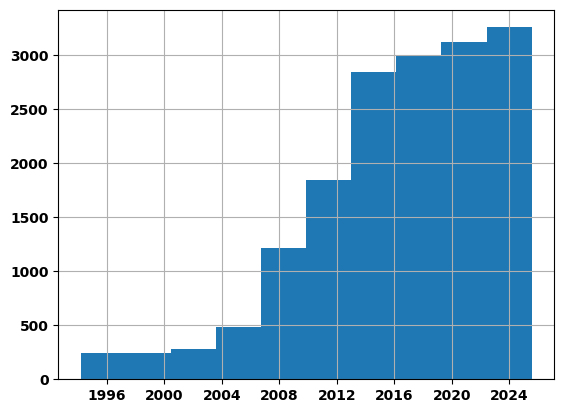

In [676]:
test2["Date"].hist() #"Modern age of UFC/MMA started in 2000 with the adoption of unified rules. I will cut out all fights before that."

In [677]:
test2.to_csv("test2.csv")

In [678]:
test3 = test2.copy()

In [679]:
test3

,index,Date,Fighter,Opponent,KD_Absorbed,STR_Absorbed,SUB_Faced,Is_Winner,Last_Fight_Date,Days_Since_Last_Fight,Prev_KD_Absorbed,Prev_STR_Absorbed,Prev_SUB_Faced,Past_3_KD_Absorbed,Past_3_STR_Absorbed,Past_3_SUB_Faced
0,0,2025-07-26,Robert Whittaker,Reinier de Ridder,0.0,67.0,0.0,False,2024-10-26,273 days,0.0,3.0,1.0,0.0,25.000000,0.333333
1,1,2025-07-26,Marcus McGhee,Petr Yan,0.0,81.0,0.0,False,2024-11-16,252 days,0.0,48.0,0.0,0.0,26.666667,0.000000
2,11,2025-07-26,Martin Buday,Marcus Buchecha,0.0,24.0,0.0,True,2025-04-05,112 days,0.0,36.0,0.0,0.0,53.000000,0.000000
3,10,2025-07-26,Steven Nguyen,Mohammad Yahya,0.0,57.0,0.0,True,2024-03-23,490 days,1.0,105.0,0.0,NaN,NaN,NaN
4,9,2025-07-26,Billy Elekana,Ibo Aslan,0.0,28.0,0.0,True,2025-01-18,189 days,0.0,47.0,2.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16547,8262,1994-03-11,Remco Pardoel,Royce Gracie,0.0,0.0,1.0,False,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
16548,8263,1994-03-11,Johnny Rhodes,Patrick Smith,0.0,5.0,1.0,False,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
16549,8264,1994-03-11,Jason DeLucia,Royce Gracie,0.0,0.0,1.0,False,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
16550,8265,1994-03-11,Orlando Wiet,Remco Pardoel,0.0,7.0,0.0,False,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [680]:
# test3 = test3[test3["Date"].dt.year >= 2000]

In [681]:
test3["UFC_Debut"] = test3["Last_Fight_Date"].isna()

In [682]:
test3[test3["Fighter"] == "Reinier de Ridder"]

,index,Date,Fighter,Opponent,KD_Absorbed,STR_Absorbed,SUB_Faced,Is_Winner,Last_Fight_Date,Days_Since_Last_Fight,Prev_KD_Absorbed,Prev_STR_Absorbed,Prev_SUB_Faced,Past_3_KD_Absorbed,Past_3_STR_Absorbed,Past_3_SUB_Faced,UFC_Debut
13,0,2025-07-26,Reinier de Ridder,Robert Whittaker,1.0,66.0,0.0,True,2025-05-03,84 days,0.0,8.0,0.0,0.0,16.333333,0.0,False
240,120,2025-05-03,Reinier de Ridder,Bo Nickal,0.0,8.0,0.0,True,2025-01-18,105 days,0.0,11.0,0.0,NaN,NaN,NaN,False
565,279,2025-01-18,Reinier de Ridder,Kevin Holland,0.0,11.0,0.0,True,2024-11-09,70 days,0.0,30.0,0.0,NaN,NaN,NaN,False
713,355,2024-11-09,Reinier de Ridder,Gerald Meerschaert,0.0,30.0,0.0,True,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,True


In [683]:
test3["Prev_Fight_Result"] = test3.groupby("Fighter").transform(lambda x: x.shift(-1))["Is_Winner"]

In [684]:
test3

,index,Date,Fighter,Opponent,KD_Absorbed,STR_Absorbed,SUB_Faced,Is_Winner,Last_Fight_Date,Days_Since_Last_Fight,Prev_KD_Absorbed,Prev_STR_Absorbed,Prev_SUB_Faced,Past_3_KD_Absorbed,Past_3_STR_Absorbed,Past_3_SUB_Faced,UFC_Debut,Prev_Fight_Result
0,0,2025-07-26,Robert Whittaker,Reinier de Ridder,0.0,67.0,0.0,False,2024-10-26,273 days,0.0,3.0,1.0,0.0,25.000000,0.333333,False,False
1,1,2025-07-26,Marcus McGhee,Petr Yan,0.0,81.0,0.0,False,2024-11-16,252 days,0.0,48.0,0.0,0.0,26.666667,0.000000,False,True
2,11,2025-07-26,Martin Buday,Marcus Buchecha,0.0,24.0,0.0,True,2025-04-05,112 days,0.0,36.0,0.0,0.0,53.000000,0.000000,False,True
3,10,2025-07-26,Steven Nguyen,Mohammad Yahya,0.0,57.0,0.0,True,2024-03-23,490 days,1.0,105.0,0.0,NaN,NaN,NaN,False,False
4,9,2025-07-26,Billy Elekana,Ibo Aslan,0.0,28.0,0.0,True,2025-01-18,189 days,0.0,47.0,2.0,NaN,NaN,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16547,8262,1994-03-11,Remco Pardoel,Royce Gracie,0.0,0.0,1.0,False,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN
16548,8263,1994-03-11,Johnny Rhodes,Patrick Smith,0.0,5.0,1.0,False,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN
16549,8264,1994-03-11,Jason DeLucia,Royce Gracie,0.0,0.0,1.0,False,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN
16550,8265,1994-03-11,Orlando Wiet,Remco Pardoel,0.0,7.0,0.0,False,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN


In [685]:
# test3["Prev_3_Fight_Win_Rate"] = test3.groupby("Fighter", as_index=False)["Is_Winner"].rolling(3).mean()["Is_Winner"].shift(-3)
test3["Prev_3_Fight_Win_Rate"] = (test3.groupby("Fighter")["Prev_Fight_Result"].rolling(3).mean().shift(-2).reset_index(level=0, drop=True))


In [686]:
test3[test3["Fighter"] == "Max Holloway"]

,index,Date,Fighter,Opponent,KD_Absorbed,STR_Absorbed,SUB_Faced,Is_Winner,Last_Fight_Date,Days_Since_Last_Fight,Prev_KD_Absorbed,Prev_STR_Absorbed,Prev_SUB_Faced,Past_3_KD_Absorbed,Past_3_STR_Absorbed,Past_3_SUB_Faced,UFC_Debut,Prev_Fight_Result,Prev_3_Fight_Win_Rate
26,12,2025-07-19,Max Holloway,Dustin Poirier,1.0,109.0,1.0,True,2024-10-26,266 days,1.0,75.0,0.0,0.333333,70.666667,0.0,False,False,0.666667
762,378,2024-10-26,Max Holloway,Ilia Topuria,1.0,75.0,0.0,False,2024-04-13,196 days,0.0,103.0,0.0,0.000000,71.000000,0.0,False,True,1.000000
1322,658,2024-04-13,Max Holloway,Justin Gaethje,0.0,103.0,0.0,True,2023-08-26,231 days,0.0,34.0,0.0,0.000000,103.000000,0.0,False,True,0.666667
1941,970,2023-08-26,Max Holloway,Chan Sung Jung,0.0,34.0,0.0,True,2023-04-15,133 days,0.0,76.0,0.0,0.000000,144.666667,0.0,False,True,0.666667
2390,1190,2023-04-15,Max Holloway,Arnold Allen,0.0,76.0,0.0,True,2022-07-02,287 days,0.0,199.0,0.0,0.000000,163.666667,0.0,False,False,0.666667
3173,1583,2022-07-02,Max Holloway,Alexander Volkanovski,0.0,199.0,0.0,False,2021-11-13,231 days,0.0,159.0,0.0,0.000000,143.000000,0.0,False,True,0.666667
3808,1901,2021-11-13,Max Holloway,Yair Rodriguez,0.0,159.0,0.0,True,2021-01-16,301 days,0.0,133.0,0.0,0.000000,142.333333,0.0,False,True,0.333333
4705,2349,2021-01-16,Max Holloway,Calvin Kattar,0.0,133.0,0.0,True,2020-07-11,189 days,0.0,137.0,0.0,0.000000,130.000000,0.0,False,False,0.333333
5245,2621,2020-07-11,Max Holloway,Alexander Volkanovski,0.0,137.0,0.0,False,2019-12-14,210 days,0.0,157.0,0.0,0.000000,143.666667,0.0,False,False,0.333333
5660,2829,2019-12-14,Max Holloway,Alexander Volkanovski,0.0,157.0,0.0,False,2019-07-27,140 days,0.0,96.0,0.0,0.000000,128.000000,0.0,False,True,0.666667


In [687]:
test3.rename(columns={"Prev_Fight_Result": "Won_Last_Fight"}, inplace=True)

In [688]:
test3[test3["Fighter"] == "Reinier de Ridder"]

,index,Date,Fighter,Opponent,KD_Absorbed,STR_Absorbed,SUB_Faced,Is_Winner,Last_Fight_Date,Days_Since_Last_Fight,Prev_KD_Absorbed,Prev_STR_Absorbed,Prev_SUB_Faced,Past_3_KD_Absorbed,Past_3_STR_Absorbed,Past_3_SUB_Faced,UFC_Debut,Won_Last_Fight,Prev_3_Fight_Win_Rate
13,0,2025-07-26,Reinier de Ridder,Robert Whittaker,1.0,66.0,0.0,True,2025-05-03,84 days,0.0,8.0,0.0,0.0,16.333333,0.0,False,True,1.0
240,120,2025-05-03,Reinier de Ridder,Bo Nickal,0.0,8.0,0.0,True,2025-01-18,105 days,0.0,11.0,0.0,NaN,NaN,NaN,False,True,NaN
565,279,2025-01-18,Reinier de Ridder,Kevin Holland,0.0,11.0,0.0,True,2024-11-09,70 days,0.0,30.0,0.0,NaN,NaN,NaN,False,True,NaN
713,355,2024-11-09,Reinier de Ridder,Gerald Meerschaert,0.0,30.0,0.0,True,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN


In [690]:
test3.to_csv("test3.csv")

In [691]:
test4 = test3.copy()

In [692]:
test4[test4["Fighter"] == "Reinier de Ridder"]

,index,Date,Fighter,Opponent,KD_Absorbed,STR_Absorbed,SUB_Faced,Is_Winner,Last_Fight_Date,Days_Since_Last_Fight,Prev_KD_Absorbed,Prev_STR_Absorbed,Prev_SUB_Faced,Past_3_KD_Absorbed,Past_3_STR_Absorbed,Past_3_SUB_Faced,UFC_Debut,Won_Last_Fight,Prev_3_Fight_Win_Rate
13,0,2025-07-26,Reinier de Ridder,Robert Whittaker,1.0,66.0,0.0,True,2025-05-03,84 days,0.0,8.0,0.0,0.0,16.333333,0.0,False,True,1.0
240,120,2025-05-03,Reinier de Ridder,Bo Nickal,0.0,8.0,0.0,True,2025-01-18,105 days,0.0,11.0,0.0,NaN,NaN,NaN,False,True,NaN
565,279,2025-01-18,Reinier de Ridder,Kevin Holland,0.0,11.0,0.0,True,2024-11-09,70 days,0.0,30.0,0.0,NaN,NaN,NaN,False,True,NaN
713,355,2024-11-09,Reinier de Ridder,Gerald Meerschaert,0.0,30.0,0.0,True,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN


In [693]:
test4 = test4.sort_values("Date", ascending=True)

In [694]:
test4["Is_Winner"] = test4["Is_Winner"] == 1.0

In [695]:
test4

,index,Date,Fighter,Opponent,KD_Absorbed,STR_Absorbed,SUB_Faced,Is_Winner,Last_Fight_Date,Days_Since_Last_Fight,Prev_KD_Absorbed,Prev_STR_Absorbed,Prev_SUB_Faced,Past_3_KD_Absorbed,Past_3_STR_Absorbed,Past_3_SUB_Faced,UFC_Debut,Won_Last_Fight,Prev_3_Fight_Win_Rate
16551,8275,1994-03-11,Scott Morris,Sean Daugherty,0.0,0.0,0.0,True,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN
16522,8270,1994-03-11,Remco Pardoel,Alberta Cerra Leon,0.0,1.0,0.0,True,1994-03-11,0 days,0.0,1.0,0.0,NaN,NaN,NaN,False,True,NaN
16523,8271,1994-03-11,Orlando Wiet,Robert Lucarelli,0.0,2.0,1.0,True,1994-03-11,0 days,0.0,7.0,0.0,NaN,NaN,NaN,False,False,NaN
16524,8268,1994-03-11,Royce Gracie,Minoki Ichihara,0.0,3.0,0.0,True,1994-03-11,0 days,0.0,0.0,0.0,0.000000,0.333333,0.000000,False,True,1.000000
16525,8267,1994-03-11,Patrick Smith,Scott Morris,0.0,0.0,0.0,True,1994-03-11,0 days,0.0,4.0,0.0,0.000000,3.000000,0.000000,False,True,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,4,2025-07-26,Nikita Krylov,Bogdan Guskov,1.0,23.0,0.0,False,2025-04-12,105 days,1.0,8.0,0.0,0.333333,18.333333,0.333333,False,False,0.666667
22,3,2025-07-26,Jose Ochoa,Asu Almabayev,0.0,22.0,2.0,False,2025-06-14,42 days,0.0,9.0,0.0,NaN,NaN,NaN,False,True,NaN
23,2,2025-07-26,Marc-Andre Barriault,Shara Magomedov,0.0,93.0,0.0,False,2025-05-10,77 days,0.0,6.0,0.0,0.666667,9.000000,0.333333,False,True,0.333333
12,1,2025-07-26,Petr Yan,Marcus McGhee,0.0,64.0,0.0,True,2024-11-23,245 days,0.0,53.0,0.0,0.000000,95.333333,0.000000,False,True,0.666667


In [696]:
test4["Won_Last_Fight"] = test4["Won_Last_Fight"] == True

In [697]:
test4[test4["Fighter"] == "Marc-Andre Barriault"].sort_values("Date", ascending=False)

,index,Date,Fighter,Opponent,KD_Absorbed,STR_Absorbed,SUB_Faced,Is_Winner,Last_Fight_Date,Days_Since_Last_Fight,Prev_KD_Absorbed,Prev_STR_Absorbed,Prev_SUB_Faced,Past_3_KD_Absorbed,Past_3_STR_Absorbed,Past_3_SUB_Faced,UFC_Debut,Won_Last_Fight,Prev_3_Fight_Win_Rate
23,2,2025-07-26,Marc-Andre Barriault,Shara Magomedov,0.0,93.0,0.0,False,2025-05-10,77 days,0.0,6.0,0.0,0.666667,9.000000,0.333333,False,True,0.333333
222,116,2025-05-10,Marc-Andre Barriault,Bruno Silva,0.0,6.0,0.0,True,2024-11-02,189 days,1.0,13.0,1.0,0.666667,53.666667,0.333333,False,False,0.000000
731,369,2024-11-02,Marc-Andre Barriault,Dustin Stoltzfus,1.0,13.0,1.0,False,2024-06-29,126 days,1.0,8.0,0.0,0.333333,77.000000,0.000000,False,False,0.333333
1098,550,2024-06-29,Marc-Andre Barriault,Joe Pyfer,1.0,8.0,0.0,False,2024-01-20,161 days,0.0,140.0,0.0,0.000000,101.666667,0.000000,False,False,0.666667
1600,799,2024-01-20,Marc-Andre Barriault,Chris Curtis,0.0,140.0,0.0,False,2023-06-10,224 days,0.0,83.0,0.0,0.000000,68.000000,0.666667,False,True,0.666667
2233,1113,2023-06-10,Marc-Andre Barriault,Eryk Anders,0.0,83.0,0.0,True,2023-03-04,98 days,0.0,82.0,0.0,0.000000,44.333333,0.666667,False,True,0.666667
2509,1262,2023-03-04,Marc-Andre Barriault,Julian Marquez,0.0,82.0,0.0,True,2022-09-17,168 days,0.0,39.0,2.0,0.333333,20.666667,0.666667,False,False,0.333333
2937,1464,2022-09-17,Marc-Andre Barriault,Anthony Hernandez,0.0,39.0,2.0,False,2022-04-23,147 days,0.0,12.0,0.0,0.333333,36.000000,0.000000,False,True,0.666667
3398,1695,2022-04-23,Marc-Andre Barriault,Jordan Wright,0.0,12.0,0.0,True,2022-02-05,77 days,1.0,11.0,0.0,0.333333,68.000000,0.000000,False,False,0.666667
3641,1824,2022-02-05,Marc-Andre Barriault,Chidi Njokuani,1.0,11.0,0.0,False,2021-09-04,154 days,0.0,85.0,0.0,0.000000,76.666667,0.000000,False,True,1.000000


In [698]:
test4["Wins_Before_Fight"] = test4[["Fighter", "Won_Last_Fight"]].groupby("Fighter").cumsum()

In [699]:
test4.sort_values("Date", ascending=False)

,index,Date,Fighter,Opponent,KD_Absorbed,STR_Absorbed,SUB_Faced,Is_Winner,Last_Fight_Date,Days_Since_Last_Fight,Prev_KD_Absorbed,Prev_STR_Absorbed,Prev_SUB_Faced,Past_3_KD_Absorbed,Past_3_STR_Absorbed,Past_3_SUB_Faced,UFC_Debut,Won_Last_Fight,Prev_3_Fight_Win_Rate,Wins_Before_Fight
0,0,2025-07-26,Robert Whittaker,Reinier de Ridder,0.0,67.0,0.0,False,2024-10-26,273 days,0.0,3.0,1.0,0.000000,25.000000,0.333333,False,False,0.666667,17
18,8,2025-07-26,Amanda Ribas,Tabatha Ricci,0.0,34.0,0.0,False,2025-01-11,196 days,0.0,27.0,1.0,0.000000,58.333333,0.333333,False,False,0.333333,7
9,4,2025-07-26,Bogdan Guskov,Nikita Krylov,0.0,16.0,0.0,True,2025-01-18,189 days,0.0,20.0,0.0,0.000000,17.333333,0.333333,False,True,1.000000,3
8,5,2025-07-26,Bryce Mitchell,Said Nurmagomedov,1.0,20.0,1.0,True,2025-04-12,105 days,1.0,27.0,3.0,0.666667,11.666667,1.333333,False,False,0.333333,8
7,6,2025-07-26,Muslim Salikhov,Carlos Leal,0.0,5.0,0.0,True,2024-11-23,245 days,0.0,9.0,0.0,0.333333,21.000000,0.000000,False,True,0.666667,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16540,8272,1994-03-11,Thaddeus Luster,Frank Hamaker,0.0,2.0,3.0,False,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,True,False,NaN,0
16539,8273,1994-03-11,David Levicki,Johnny Rhodes,0.0,11.0,0.0,False,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,True,False,NaN,0
16538,8274,1994-03-11,Ray Wizard,Patrick Smith,0.0,1.0,1.0,False,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,True,False,NaN,0
16543,8270,1994-03-11,Alberta Cerra Leon,Remco Pardoel,0.0,4.0,1.0,False,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,True,False,NaN,0


In [700]:
test4[test4["Fighter"] == "Kevin Randleman"]

,index,Date,Fighter,Opponent,KD_Absorbed,STR_Absorbed,SUB_Faced,Is_Winner,Last_Fight_Date,Days_Since_Last_Fight,Prev_KD_Absorbed,Prev_STR_Absorbed,Prev_SUB_Faced,Past_3_KD_Absorbed,Past_3_STR_Absorbed,Past_3_SUB_Faced,UFC_Debut,Won_Last_Fight,Prev_3_Fight_Win_Rate,Wins_Before_Fight
16166,8085,1999-03-05,Kevin Randleman,Maurice Smith,0.0,9.0,2.0,True,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,True,False,NaN,0
16156,8075,1999-05-07,Kevin Randleman,Bas Rutten,0.0,18.0,1.0,False,1999-03-05,63 days,0.0,9.0,2.0,NaN,NaN,NaN,False,True,NaN,1
16111,8052,1999-11-19,Kevin Randleman,Pete Williams,1.0,8.0,1.0,True,1999-05-07,196 days,0.0,18.0,1.0,NaN,NaN,NaN,False,False,NaN,1
16071,8031,2000-06-09,Kevin Randleman,Pedro Rizzo,0.0,12.0,0.0,True,1999-11-19,203 days,1.0,8.0,1.0,0.333333,11.666667,1.333333,False,True,0.666667,2
16033,8016,2000-11-17,Kevin Randleman,Randy Couture,0.0,28.0,1.0,False,2000-06-09,161 days,0.0,12.0,0.0,0.333333,12.666667,0.666667,False,True,0.666667,3
15986,7995,2001-05-04,Kevin Randleman,Chuck Liddell,1.0,3.0,0.0,False,2000-11-17,168 days,0.0,28.0,1.0,0.333333,16.000000,0.666667,False,False,0.666667,3
15934,7966,2002-01-11,Kevin Randleman,Renato Sobral,0.0,2.0,5.0,True,2001-05-04,252 days,1.0,3.0,0.0,0.333333,14.333333,0.333333,False,False,0.333333,3


In [701]:
test4.loc[test4["UFC_Debut"] == True, "Won_Last_Fight"] = True
test4["Lost_Last_Fight"] = test4["Won_Last_Fight"] == False

In [702]:
test4["Losses_Before_Fight"]= test4[["Fighter", "Lost_Last_Fight"]].groupby("Fighter").cumsum()

In [703]:
test4[test4["Fighter"] == "Robert Whittaker"]

,index,Date,Fighter,Opponent,KD_Absorbed,STR_Absorbed,SUB_Faced,Is_Winner,Last_Fight_Date,Days_Since_Last_Fight,...,Prev_SUB_Faced,Past_3_KD_Absorbed,Past_3_STR_Absorbed,Past_3_SUB_Faced,UFC_Debut,Won_Last_Fight,Prev_3_Fight_Win_Rate,Wins_Before_Fight,Lost_Last_Fight,Losses_Before_Fight
12287,6141,2012-12-14,Robert Whittaker,Brad Scott,0.0,55.0,0.0,True,NaT,NaT,...,NaN,NaN,NaN,NaN,True,True,NaN,0,False,0
11934,5971,2013-05-25,Robert Whittaker,Colton Smith,1.0,33.0,1.0,True,2012-12-14,162 days,...,0.0,NaN,NaN,NaN,False,True,NaN,1,False,0
11784,5884,2013-08-28,Robert Whittaker,Court McGee,0.0,88.0,0.0,False,2013-05-25,95 days,...,1.0,NaN,NaN,NaN,False,True,NaN,2,False,0
11330,5667,2014-02-22,Robert Whittaker,Stephen Thompson,1.0,38.0,0.0,False,2013-08-28,178 days,...,0.0,0.333333,58.666667,0.333333,False,False,0.666667,2,True,1
10977,5502,2014-06-28,Robert Whittaker,Mike Rhodes,0.0,47.0,0.0,True,2014-02-22,126 days,...,0.0,0.666667,53.000000,0.333333,False,False,0.333333,2,True,2
10616,5309,2014-11-07,Robert Whittaker,Clint Hester,0.0,28.0,0.0,True,2014-06-28,132 days,...,0.0,0.333333,57.666667,0.000000,False,True,0.333333,3,False,2
10144,5070,2015-05-09,Robert Whittaker,Brad Tavares,0.0,2.0,0.0,True,2014-11-07,183 days,...,0.0,0.333333,37.666667,0.000000,False,True,0.666667,4,False,2
9670,4829,2015-11-14,Robert Whittaker,Uriah Hall,0.0,45.0,0.0,True,2015-05-09,189 days,...,0.0,0.000000,25.666667,0.000000,False,True,1.000000,5,False,2
9260,4622,2016-04-23,Robert Whittaker,Rafael Natal,0.0,62.0,0.0,True,2015-11-14,161 days,...,0.0,0.000000,25.000000,0.000000,False,True,1.000000,6,False,2
8643,4321,2016-11-26,Robert Whittaker,Derek Brunson,0.0,19.0,0.0,True,2016-04-23,217 days,...,0.0,0.000000,36.333333,0.000000,False,True,1.000000,7,False,2


In [704]:
test4.sort_values("Date", ascending=False, inplace=True)

In [705]:
test4.head(15)

,index,Date,Fighter,Opponent,KD_Absorbed,STR_Absorbed,SUB_Faced,Is_Winner,Last_Fight_Date,Days_Since_Last_Fight,...,Prev_SUB_Faced,Past_3_KD_Absorbed,Past_3_STR_Absorbed,Past_3_SUB_Faced,UFC_Debut,Won_Last_Fight,Prev_3_Fight_Win_Rate,Wins_Before_Fight,Lost_Last_Fight,Losses_Before_Fight
0,0,2025-07-26,Robert Whittaker,Reinier de Ridder,0.0,67.0,0.0,False,2024-10-26,273 days,...,1.0,0.000000,25.000000,0.333333,False,False,0.666667,17,True,6
18,8,2025-07-26,Amanda Ribas,Tabatha Ricci,0.0,34.0,0.0,False,2025-01-11,196 days,...,1.0,0.000000,58.333333,0.333333,False,False,0.333333,7,True,5
9,4,2025-07-26,Bogdan Guskov,Nikita Krylov,0.0,16.0,0.0,True,2025-01-18,189 days,...,0.0,0.000000,17.333333,0.333333,False,True,1.000000,3,False,1
8,5,2025-07-26,Bryce Mitchell,Said Nurmagomedov,1.0,20.0,1.0,True,2025-04-12,105 days,...,3.0,0.666667,11.666667,1.333333,False,False,0.333333,8,True,3
7,6,2025-07-26,Muslim Salikhov,Carlos Leal,0.0,5.0,0.0,True,2024-11-23,245 days,...,0.0,0.333333,21.000000,0.000000,False,True,0.666667,8,False,4
6,7,2025-07-26,Davey Grant,Da'Mon Blackshear,0.0,33.0,1.0,True,2024-12-14,224 days,...,0.0,0.000000,53.000000,0.000000,False,True,0.666667,7,False,6
4,9,2025-07-26,Billy Elekana,Ibo Aslan,0.0,28.0,0.0,True,2025-01-18,189 days,...,2.0,NaN,NaN,NaN,False,False,NaN,0,True,1
2,11,2025-07-26,Martin Buday,Marcus Buchecha,0.0,24.0,0.0,True,2025-04-05,112 days,...,0.0,0.000000,53.000000,0.000000,False,True,0.666667,6,False,1
1,1,2025-07-26,Marcus McGhee,Petr Yan,0.0,81.0,0.0,False,2024-11-16,252 days,...,0.0,0.000000,26.666667,0.000000,False,True,1.000000,4,False,0
10,3,2025-07-26,Asu Almabayev,Jose Ochoa,0.0,26.0,2.0,True,2025-03-01,147 days,...,0.0,0.000000,27.333333,0.666667,False,False,0.666667,4,True,1


In [706]:
test4.to_csv("test4.csv")

In [279]:
import matplotlib.pyplot as plt
import numpy as np

In [283]:
median_layoff

np.float64(168.0)

In [284]:
# days = test2["Days_Since_Last_Fight"].dropna().astype("int")
# average_layoff = np.mean(days)
# median_layoff = np.median(days)


In [285]:
# median_layoff_fill = np.median(test2["Days_Since_Last_Fight"].dropna())

In [286]:

# test2["Days_Since_Last_Fight"].dt.days.hist(bins=50)
# plt.axvline(x=average_layoff, color="red")
# plt.axvline(x=median_layoff, color="purple")

In [288]:
test2["Days_Since_Last_Fight"].fillna("168 Days", inplace=True)

C:\Users\alexz\AppData\Local\Temp\ipykernel_26084\3869825425.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test2["Days_Since_Last_Fight"].fillna("168 Days", inplace=True)


In [289]:
test2.isna().sum()

Unnamed: 0                  0
index                       0
Date                        0
Fighter                     0
Opponent                    0
KD_Absorbed                 0
STR_Absorbed                0
SUB_Faced                   0
Is_Winner                   0
Prev_KD_Absorbed            0
Prev_STR_Absorbed           0
Prev_SUB_Faced              0
Past_3_KD_Absorbed          0
Past_3_STR_Absorbed         0
Past_3_SUB_Faced            0
Last_Fight_Date          1483
Days_Since_Last_Fight       0
dtype: int64

In [298]:
date_pattern =r"[0-9]+"
test2["Days_Since_Last_Fight"].str.findall(date_pattern)


0       [273]
1       [252]
2       [112]
3       [245]
4       [224]
        ...  
9946      [0]
9947     [98]
9948    [182]
9949    [168]
9950    [168]
Name: Days_Since_Last_Fight, Length: 9951, dtype: object

In [301]:
test2["Days_Since_Last_Fight"] = test2["Days_Since_Last_Fight"].str.findall(date_pattern).str[0]

In [302]:
test2 #For fighters who were removed from the dataset because they didn't have a "past 3 fights" to get stats from, and thus there previous fight date w

,Unnamed: 0,index,Date,Fighter,Opponent,KD_Absorbed,STR_Absorbed,SUB_Faced,Is_Winner,Prev_KD_Absorbed,Prev_STR_Absorbed,Prev_SUB_Faced,Past_3_KD_Absorbed,Past_3_STR_Absorbed,Past_3_SUB_Faced,Last_Fight_Date,Days_Since_Last_Fight
0,0,0,2025-07-26,Robert Whittaker,Reinier de Ridder,0.0,67.0,0.0,False,0.0,3.0,1.0,0.0,25.000000,0.333333,2024-10-26,273
1,1,1,2025-07-26,Marcus McGhee,Petr Yan,0.0,81.0,0.0,False,0.0,48.0,0.0,0.0,26.666667,0.000000,2024-11-16,252
2,2,11,2025-07-26,Martin Buday,Marcus Buchecha,0.0,24.0,0.0,True,0.0,36.0,0.0,0.0,53.000000,0.000000,2025-04-05,112
3,5,8,2025-07-26,Tabatha Ricci,Amanda Ribas,0.0,30.0,0.0,True,0.0,78.0,0.0,0.0,90.000000,0.000000,2024-11-23,245
4,6,7,2025-07-26,Davey Grant,Da'Mon Blackshear,0.0,33.0,1.0,True,0.0,69.0,0.0,0.0,53.000000,0.000000,2024-12-14,224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9946,13899,8247,1994-12-16,Royce Gracie,Keith Hackney,0.0,4.0,0.0,True,0.0,0.0,0.0,0.0,3.000000,0.000000,1994-12-16,0
9947,13901,8251,1994-12-16,Royce Gracie,Ron van Clief,0.0,0.0,0.0,True,0.0,6.0,0.0,0.0,3.000000,0.000000,1994-09-09,98
9948,13904,8257,1994-09-09,Royce Gracie,Kimo Leopoldo,0.0,6.0,0.0,True,0.0,3.0,0.0,0.0,1.000000,0.000000,1994-03-11,182
9949,13908,8268,1994-03-11,Royce Gracie,Minoki Ichihara,0.0,3.0,0.0,True,0.0,0.0,0.0,0.0,0.333333,0.000000,None,168


In [531]:
df

,Unnamed: 0,Date,Weight class,Method,Round,Winner,Blue,Red,Blue_Kd_Landed,Red_Kd_Landed,Blue_Str_Landed,Red_Str_Landed,Blue_Sub_Landed,Red_Sub_Landed
0,0,2025-07-26,Middleweight,DEC,5,Blue,Reinier de Ridder,Robert Whittaker,0.0,1.0,67.0,66.0,0.0,0.0
1,1,2025-07-26,Bantamweight,DEC,3,Blue,Petr Yan,Marcus McGhee,0.0,0.0,81.0,64.0,0.0,0.0
2,2,2025-07-26,Middleweight,DEC,3,Blue,Shara Magomedov,Marc-Andre Barriault,0.0,0.0,93.0,39.0,0.0,0.0
3,3,2025-07-26,Flyweight,DEC,3,Blue,Asu Almabayev,Jose Ochoa,0.0,0.0,22.0,26.0,2.0,2.0
4,4,2025-07-26,Light Heavyweight,KO,1,Blue,Bogdan Guskov,Nikita Krylov,1.0,0.0,23.0,16.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8271,8271,1994-03-11,Open Weight,KO,1,Blue,Orlando Wiet,Robert Lucarelli,0.0,0.0,8.0,2.0,0.0,1.0
8272,8272,1994-03-11,Open Weight,SUB,1,Blue,Frank Hamaker,Thaddeus Luster,0.0,0.0,2.0,0.0,3.0,0.0
8273,8273,1994-03-11,Open Weight,KO,1,Blue,Johnny Rhodes,David Levicki,0.0,0.0,11.0,4.0,0.0,0.0
8274,8274,1994-03-11,Open Weight,SUB,1,Blue,Patrick Smith,Ray Wizard,0.0,0.0,1.0,1.0,1.0,0.0


In [538]:
missing_info = df[["Weight class", "Method", "Round", "Blue", "Red", "Date"]]
missing_info2 = missing_info.copy()

In [540]:
missing_info2[["Red", "Blue"]] = missing_info2[["Blue", "Red"]]

In [542]:
missing_infofinal = pd.concat([missing_info, missing_info2])

In [543]:
missing_infofinal

,Weight class,Method,Round,Blue,Red,Date
0,Middleweight,DEC,5,Reinier de Ridder,Robert Whittaker,2025-07-26
1,Bantamweight,DEC,3,Petr Yan,Marcus McGhee,2025-07-26
2,Middleweight,DEC,3,Shara Magomedov,Marc-Andre Barriault,2025-07-26
3,Flyweight,DEC,3,Asu Almabayev,Jose Ochoa,2025-07-26
4,Light Heavyweight,KO,1,Bogdan Guskov,Nikita Krylov,2025-07-26
...,...,...,...,...,...,...
8271,Open Weight,KO,1,Robert Lucarelli,Orlando Wiet,1994-03-11
8272,Open Weight,SUB,1,Thaddeus Luster,Frank Hamaker,1994-03-11
8273,Open Weight,KO,1,David Levicki,Johnny Rhodes,1994-03-11
8274,Open Weight,SUB,1,Ray Wizard,Patrick Smith,1994-03-11


In [544]:
missing_infofinal.to_csv("missing_info.csv")